In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification as mk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
x, y = mk(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

In [3]:
y = y.reshape(1000, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

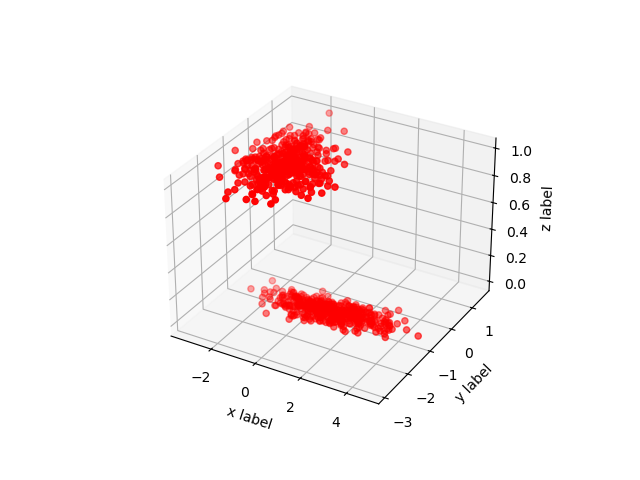

In [4]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_train[:,0], x_train[:, 1], y_train, c='r', marker='o')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')
plt.show()

In [5]:
class Simple_Logistic_regression:
    def __init__(self) -> None:
        self.alpha = None
        self.X = None
        self.Y = None
        self.weights = None

    def find_sigma(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, x, y, alpha=0.1):
        self.X = x
        self.Y = y
        self.alpha = alpha
        strt_alpha = alpha
        weights = np.array(random.sample(range(0, 10), 2)).reshape(2, 1)
        costs = []
        params_iterated = []
        for i in range(1000):
            if i == 0:
                continue
            elif i%20 == 0:
                self.alpha = strt_alpha/i
            rand_indx = np.random.randint(self.X.shape[0])
            new_cost = self.find_sigma(self.X[rand_indx] @ weights) - self.Y[rand_indx]
            costs.append(new_cost)
            params_iterated.append(weights.flatten())
            weights = weights - self.alpha * ((self.X[rand_indx] @ weights - y[rand_indx])*self.X[rand_indx]).reshape(2,1) 
        costs = np.abs(costs)
        params_iterated = np.array(params_iterated)
        min_indx = np.argmin(costs)
        self.weights = np.array(params_iterated[min_indx]).reshape(2, 1)
    
    def predict(self, x):
       y = self.find_sigma(x @ self.weights)
       y[y < 0.5] = 0
       y[y > 0.5] = 1
       return y

In [6]:
slr = Simple_Logistic_regression()
slr.fit(x_train, y_train, alpha=0.2)

In [7]:
x_train_pred = slr.predict(x_train)
x_test_pred = slr.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_true=y_train, y_pred=x_train_pred)
cm_test = confusion_matrix(y_pred=x_test_pred, y_true=y_test)
print(f"trains : {cm_train}")
print(f"test: {cm_test}")

trains : [[343  62]
 [108 287]]
test: [[78 13]
 [24 85]]
